In [2]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 9.5 MB/s eta 0:00:00


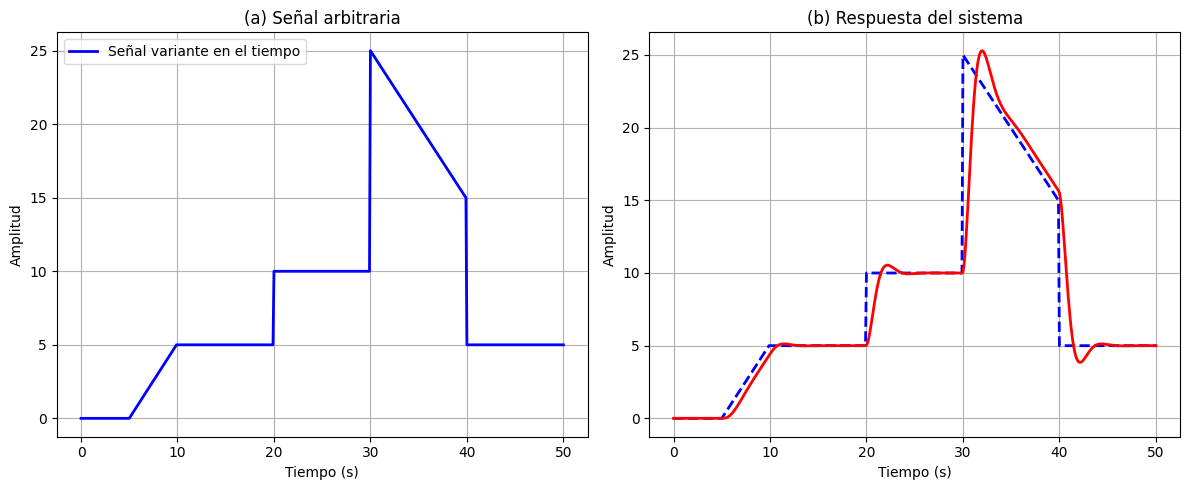

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definición del sistema
num = [3]
den = [1, 2, 3]
G = ctrl.tf(num, den)

# Tiempo de simulación
ts = 0.1
t = np.arange(0, 50 + ts, ts)

# Construcción de la señal arbitraria
s0 = np.zeros(np.sum(t < 5))                                # 0 de 0 a 5 s
s1 = np.linspace(0, 5, np.sum((t >= 5) & (t < 10)))          # rampa 0 a 5
s2 = np.ones(np.sum((t >= 10) & (t < 20))) * 5              # constante 10
s3 = np.ones(np.sum((t >= 20) & (t < 30))) * 10              # constante 15
s4 = np.linspace(25, 15, np.sum((t >= 30) & (t < 40)))                    # rampa descendente
s5 = np.ones(np.sum(t >= 40)) * 5              # constante 25

# Señal total
arbsig = np.concatenate([s0, s1, s2, s3, s4, s5])

# Simulación del sistema
# The forced_response function might return only two values in some cases
# We will use try-except to handle this
try:
    t_out, y_out, _ = ctrl.forced_response(G, T=t, U=arbsig)
except ValueError:
    t_out, y_out = ctrl.forced_response(G, T=t, U=arbsig) #Only unpack two values if three are not returned.

# Graficar resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, arbsig, 'b', linewidth=2)
plt.title("(a) Señal arbitraria")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend(["Señal variante en el tiempo"])

plt.subplot(1, 2, 2)
plt.plot(t, arbsig, 'b--', linewidth=2, label="Señal arbitraria") # Línea entrepunteada para la señal arbitraria
plt.plot(t_out, y_out, 'r', linewidth=2)
plt.title("(b) Respuesta del sistema")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()
plt.show()